In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
input_img = Input(shape=(28,28,1))

In [5]:
# Build Encoder / Downsampling
x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2,2), padding="same")(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2,2), padding="same")(x)

In [6]:
# Build Decoder / UpSampling
x = Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [8]:
x_train, x_test = x_train/255., x_test/255.

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
noise_threshold = 0.5
x_train_noisy = x_train + noise_threshold * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_threshold * np.random.normal(size=x_test.shape)

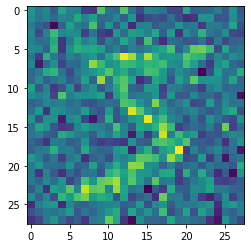

In [17]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [18]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

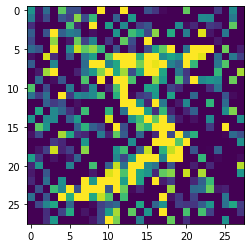

In [19]:
plt.imshow(x_train_noisy[0].reshape(28,28))
plt.show()

In [20]:
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=64, shuffle=True,
               validation_data=(x_test_noisy, x_test))

Epoch 1/5
938/938 [==============================] - 96s 100ms/step - loss: 0.1386 - val_loss: 0.1082
Epoch 2/5
938/938 [==============================] - 96s 103ms/step - loss: 0.1058 - val_loss: 0.1027
Epoch 3/5
938/938 [==============================] - 95s 101ms/step - loss: 0.1019 - val_loss: 0.1009
Epoch 4/5
938/938 [==============================] - 93s 99ms/step - loss: 0.0999 - val_loss: 0.0986
Epoch 5/5
938/938 [==============================] - 96s 102ms/step - loss: 0.0987 - val_loss: 0.0976


In [21]:
decoded_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 6s 17ms/step


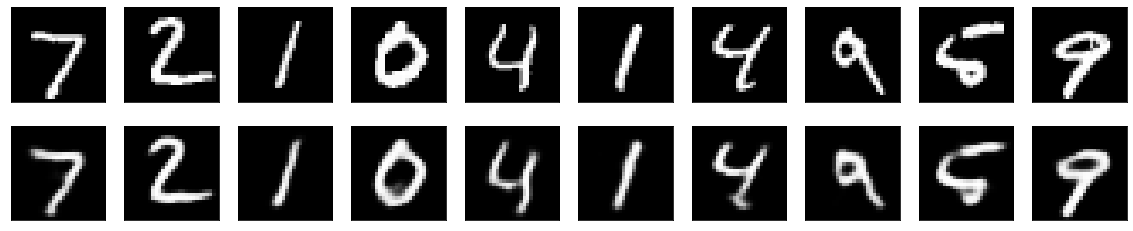

In [22]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    # ploting original image
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    # ploting decoded/reconstructued image
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()